## Traffic Jam:Predicting People's Movement into Nairobi

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
sns.set(color_codes=True)


In [6]:
#importing the datasets

train=pd.read_csv('train_revised.csv')
test=pd.read_csv('test_questions.csv')

In [7]:
train.sample(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
5612,7175,4,Mpesa,PEIGIBEJX0,04-03-18,8:50,Kisii,Nairobi,shuttle,11
1810,6593,3,Mpesa,OKEIIPK0MG,12-03-18,6:40,Kisii,Nairobi,shuttle,11
18703,9134,15B,Mpesa,0MOVK13TY9,25-01-18,7:09,Homa Bay,Nairobi,Bus,49
45791,13077,20B,Mpesa,LLMF9AGGCJ,05-04-18,7:05,Rongo,Nairobi,Bus,49
23859,9975,4A,Mpesa,C3D0UGYP9F,12-01-18,19:04,Kisii,Nairobi,Bus,49


In [8]:
test.sample(5)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
173,2289,2018-05-01,06:00,Kisii,Nairobi,shuttle,11
558,13847,2018-04-21,07:11,Homa Bay,Nairobi,Bus,49
848,14647,2018-04-29,07:13,Rongo,Nairobi,Bus,49
915,14854,2018-04-30,23:10,Rongo,Nairobi,Bus,49
702,14174,2018-04-25,07:03,Rongo,Nairobi,Bus,49


In [9]:
test.dtypes,train.dtypes

(ride_id          int64
 travel_date     object
 travel_time     object
 travel_from     object
 travel_to       object
 car_type        object
 max_capacity     int64
 dtype: object, ride_id             int64
 seat_number        object
 payment_method     object
 payment_receipt    object
 travel_date        object
 travel_time        object
 travel_from        object
 travel_to          object
 car_type           object
 max_capacity        int64
 dtype: object)

In [10]:
test.shape,train.shape

((1111, 7), (51645, 10))

In [11]:
duplicate_rows=train[train.duplicated()]
print("number of duplicate rows:",duplicate_rows.shape)

number of duplicate rows: (0, 10)


In [12]:
duplicate_rows_test=test[test.duplicated()]
print('number of duplicate rows:',duplicate_rows_test.shape)

number of duplicate rows: (0, 7)


In [13]:
test.count(),train.count()

(ride_id         1111
 travel_date     1111
 travel_time     1111
 travel_from     1111
 travel_to       1111
 car_type        1111
 max_capacity    1111
 dtype: int64, ride_id            51645
 seat_number        51645
 payment_method     51645
 payment_receipt    51645
 travel_date        51645
 travel_time        51645
 travel_from        51645
 travel_to          51645
 car_type           51645
 max_capacity       51645
 dtype: int64)

In [14]:
print(test.isnull().sum(),train.isnull().sum())

ride_id         0
travel_date     0
travel_time     0
travel_from     0
travel_to       0
car_type        0
max_capacity    0
dtype: int64 ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64


In [15]:
test.sample(5)


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
972,15005,2018-05-02,07:11,Rongo,Nairobi,Bus,49
535,5750,2018-04-22,05:00,Kisii,Nairobi,shuttle,11
340,5168,2018-04-26,10:50,Kisii,Nairobi,shuttle,11
1065,15258,2018-05-04,07:03,Nyachenge,Nairobi,Bus,49
944,14930,2018-05-01,07:03,Nyachenge,Nairobi,Bus,49


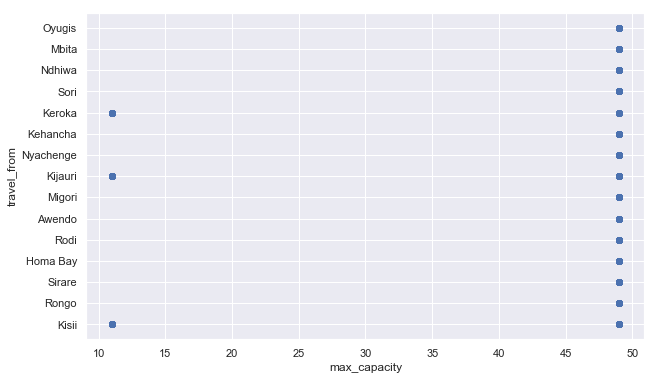

In [16]:
#plotting a scatter a plot
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(test['max_capacity'],test['travel_from'])
ax.set_xlabel("max_capacity")
ax.set_ylabel("travel_from")
plt.show()


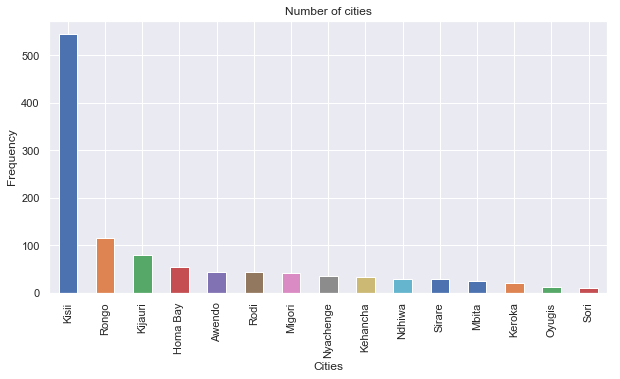

In [17]:
#plotting a histogram for cities travelled from
test.travel_from.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.xlabel("Cities")
plt.ylabel("Frequency")
plt.title("Number of cities")
plt.show()

In [18]:
#casting travel_date to datetime
test.travel_date=pd.to_datetime(test.travel_date)
train.travel_date=pd.to_datetime(train.travel_date)


In [19]:
#splitting the travel date into year and day
train['year'],test['year']=train.travel_date.dt.year, test.travel_date.dt.year
train['day'] ,test['day'] = train.travel_date.dt.dayofyear, test.travel_date.dt.dayofyear

In [20]:
train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,day
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,290
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,323
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,330
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,331
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,331


Text(0, 0.5, 'frequency')

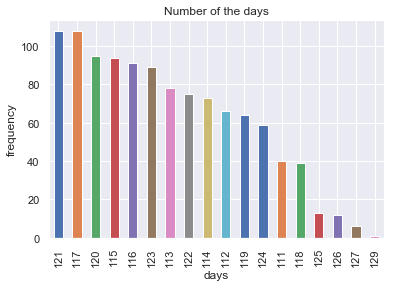

In [21]:
test.day.value_counts().nlargest(30).plot(kind='bar')
plt.title("Number of the days")
plt.xlabel('days')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Frequency')

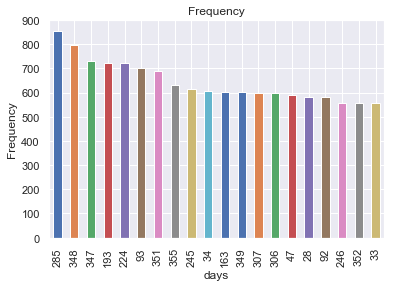

In [22]:
train.day.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.title('Frequency')

In [23]:
train.sample(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,day
843,6360,21A,Mpesa,FKETYGBGZ9,2018-03-16,7:03,Kisii,Nairobi,Bus,49,2018,75
24863,10145,11A,Mpesa,0ATCY9CD7D,2018-09-02,7:08,Kehancha,Nairobi,Bus,49,2018,245
45805,13062,4B,Mpesa,BN5AAEFOCI,2018-05-04,7:12,Migori,Nairobi,Bus,49,2018,124
40989,12361,1,Mpesa,FIZDZYDNCM,2018-03-16,7:40,Kijauri,Nairobi,shuttle,11,2018,75
7638,7515,25,Mpesa,GRUWEKHEKQ,2017-12-15,7:05,Rongo,Nairobi,Bus,49,2017,349
2903,6789,1X,Mpesa,9C2KXJEAPN,2018-09-03,9:40,Kisii,Nairobi,shuttle,11,2018,246
31230,11133,1,Mpesa,GL9ZKYRP4O,2017-12-15,8:50,Kisii,Nairobi,shuttle,11,2017,349
20836,9474,2,Mpesa,7HHQXMTOX9,2018-01-23,7:50,Kisii,Nairobi,shuttle,11,2018,23
49116,13496,25,Mpesa,U9XTQRVNID,2018-04-14,7:09,Rodi,Nairobi,Bus,49,2018,104
10588,7945,9,Mpesa,SLWHAHFU7U,2018-02-15,6:50,Kisii,Nairobi,shuttle,11,2018,46


In [24]:
train.drop(['payment_receipt'],axis=1,inplace=True)

In [26]:
train.tail(10)

,ride_id,seat_number,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,day
51635,13812,11A,Mpesa,2018-04-20,23:10,Ndhiwa,Nairobi,Bus,49,2018,110
51636,13813,5A,Mpesa,2018-04-20,7:05,Ndhiwa,Nairobi,Bus,49,2018,110
51637,13812,5A,Mpesa,2018-04-20,23:10,Ndhiwa,Nairobi,Bus,49,2018,110
51638,13812,9A,Mpesa,2018-04-20,23:10,Ndhiwa,Nairobi,Bus,49,2018,110
51639,13825,24A,Mpesa,2018-04-20,7:09,Rongo,Nairobi,Bus,49,2018,110
51640,13826,9B,Mpesa,2018-04-20,8:00,Awendo,Nairobi,Bus,49,2018,110
51641,13809,18A,Mpesa,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,110
51642,13809,17A,Mpesa,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,110
51643,13796,16B,Mpesa,2018-04-20,7:08,Awendo,Nairobi,Bus,49,2018,110
51644,14304,7,Mpesa,2017-11-14,5:10,Kisii,Nairobi,Bus,49,2017,318
